# Get LUT for amplitude/phase to gray level

- *Luis Miguel Sánchez Brea*
- *16 de junio de 2020*

Converts the Intensity(g.l) or Phase(g.l) to gray_levels.

We want a function that converts the amplitude or phases (depending on the configuration) to Gray levels.

So that, in the experiments or simulations, when we simulate $t(x,y)=A(x,y)$ or $t(x,y)=e^{i\phi(x,y)}$ we convert it into gray levels

## Load

In [1]:
from scipy import interpolate

In [2]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

In [3]:
from slm import np, sp, plt, um, mm, degrees

number of processors: 8


In [4]:
from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl
from slm.LCD_models import LCD_kopin

In [5]:
from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl, get_LUT_amplitude, get_LUT_phases
from slm.LCD_models import LCD_kopin, LCD_sony


## Parameters

In [6]:
data=np.load('best_amplitude_angles_kopin.npz')
angles_amplitude=data['angles']
print(angles_amplitude/degrees)

data=np.load('best_phase_angles_kopin.npz')
angles_phase=data['angles']
print(angles_phase/degrees)

[127.02439883  57.92425749 147.96711836  37.25893434]
[ 52.04937572  67.03487887 109.02981302  28.22204403]


In [7]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

source = Jones_vector()
source.from_matrix(v0);
source.M

array([[ 0.70710678+0.j        ],
       [-0.        -0.70710678j]])

In [8]:
LCD_model=LCD_kopin
gl=LCD_model['gl']
num_gl=len(gl)

In [9]:
LCD_experiment = LCD_jones_matrices(LCD_model)
LCD_jones = LCD_experiment.DC_to_pypol()

In [10]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(
    p1=1, p2=0, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(
    R=90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(
    R=90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(
    p1=1, p2=0, azimuth=0, length=num_gl, shape_like=LCD_jones)

polarizers = (pol1, pol2, pol3, pol4)

## Convert amplitudes

In [11]:
SLM_Jones_amplitude, amplitudes, _ = get_fields_gl(
    polarizers, LCD_jones, source, angles=angles_amplitude, has_draw=True)


In [18]:
np.savez("LUT_amplitudes.npz", amplitudes=amplitudes, gl=gl)

In [19]:
LUT_amplitudes=get_LUT_amplitude(amplitudes, gl,np.linspace(0,1,256),has_draw=True)

## Convert phases

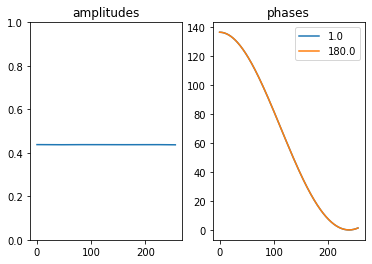

In [20]:
SLM_Jones_phase, _, phases = get_fields_gl(
    polarizers, LCD_jones, source, angles=angles_phase, has_draw=True)

In [21]:
np.savez("LUT_phases.npz", phases=phases, gl=gl)

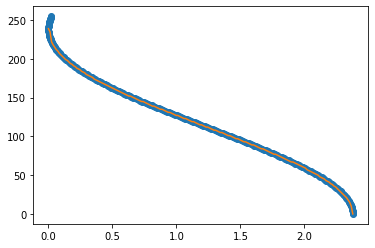

In [24]:
LUT_phases=get_LUT_phases(phases, gl,np.linspace(0,np.pi,256),has_draw=True)

The global phase of m4 * m3 * SLM * m2 * m1 * E is (deg.):
The mean value is 257.01109634107365 +- 49.44133281151107


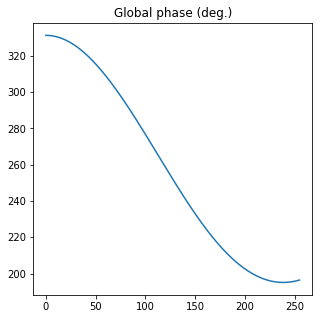

In [23]:
SLM_Jones_phase.parameters.global_phase(draw=True);